# Linear Kalman Filter


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
%matplotlib widget

## Properties of Gaussian

### Univariate Linear Transformation
$\begin{matrix} X \sim N(\mu,\sigma^2) \\ Y=aX+b \end{matrix} \Rightarrow Y=N(a*\mu+b,a^2*\sigma^2)$


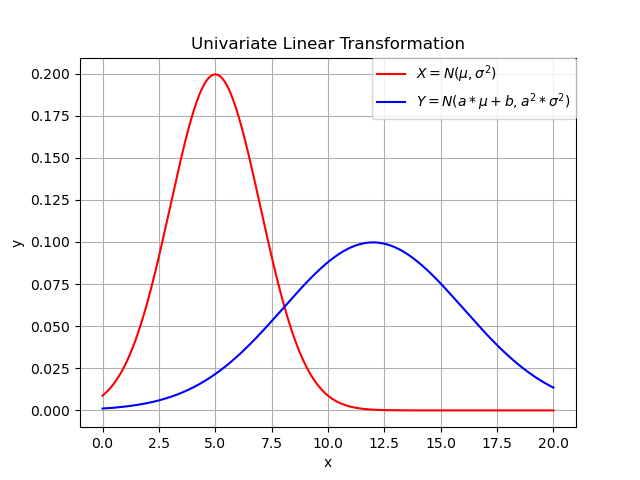

In [2]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title("Univariate Linear Transformation")

x = np.linspace(0,20,500)
mean1 = 5
sigma1 = 2
y1 = norm.pdf(x,mean1,sigma1) 
plt.plot(x,y1,'r', label='$X=N(\mu,\sigma^2)$')

a = 2
b = 2

mean2 = a*mean1+b
sigma2 = a*sigma1

y2 = norm.pdf(x,mean2,sigma2) 
plt.plot(x,y2,'b', label='$Y=N(a*\mu+b,a^2*\sigma^2)$')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

### Univariate Sum of Gaussian
$\begin{matrix} X_1 \sim N(\mu_1,\sigma_1^2) \\  X_2 \sim N(\mu_2,\sigma_2^2) \end{matrix} \Rightarrow p(X_1) p(X_2) \sim N(\frac{\sigma_2^2}{\sigma_1^2 + \sigma_2^2} \mu_1 + \frac{\sigma_1^2}{\sigma_1^2 + \sigma_2^2} \mu_2, \frac{1}{\sigma_1^{-2} + \sigma_2^{-2}})$

# mean $\mu$

$\mu = \frac{\sigma_2^2}{\sigma_1^2 + \sigma_2^2} \mu_1 + \frac{\sigma_1^2}{\sigma_1^2 + \sigma_2^2} \mu_2 = \frac{\mu_1\sigma_2^2 + \mu_2\sigma_1^2}{\sigma_1^2 + \sigma_2^2}$


# sigma $\sigma^2$
$\sigma = \frac{1}{\sigma_1^{-2} + \sigma_2^{-2}} = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2 + \sigma_2^2}$


In [3]:
def gaussian_sum ( mean1, sigma1, mean2, sigma2) :
    s1 = sigma1*sigma1
    s2 = sigma2*sigma2
    m = s2/(s1+s2)*mean1 + s1/(s1+s2)*mean2
    s = s1*s2/(s1+s2)
    return m, math.sqrt(s)

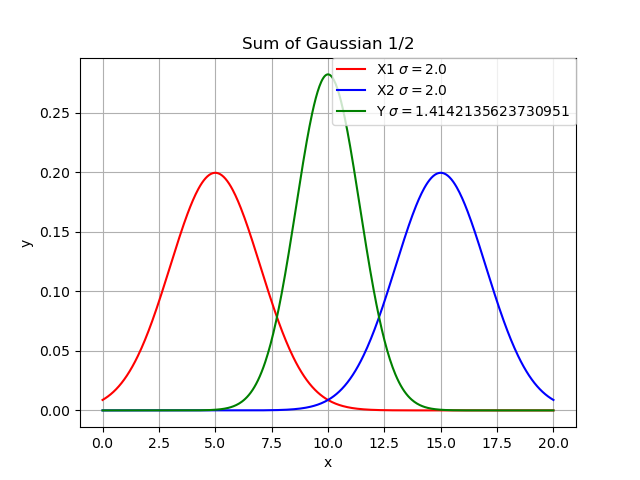

In [4]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
x = np.linspace(0,20,500)
plt.title("Sum of Gaussian 1/2")

mean1 = 5.0
sigma1 = 2.0
y1 = norm.pdf(x,mean1,sigma1) 
plt.plot(x,y1,'r', label='X1 $\sigma=$'+str(sigma1))

mean2 = 15.0
sigma2 = 2.0
y2 = norm.pdf(x,mean2,sigma2)
plt.plot(x,y2,'b', label='X2 $\sigma=$'+str(sigma2))

mean3,sigma3  = gaussian_sum(mean1, sigma1, mean2, sigma2)

y3 = norm.pdf(x,mean3,sigma3)
plt.plot(x,y3,'g', label='Y $\sigma=$'+str(sigma3))

plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

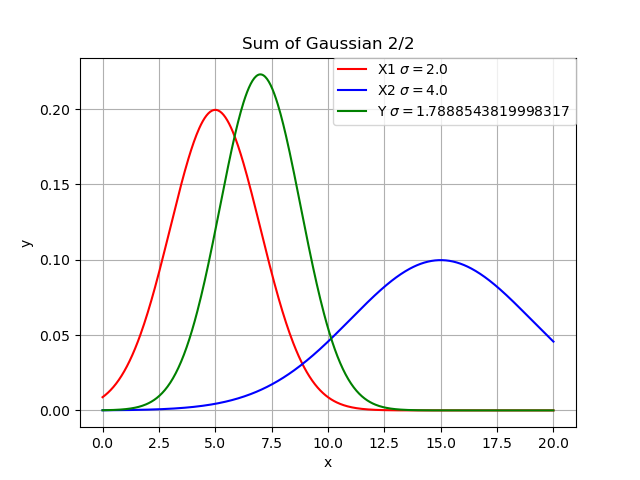

In [5]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
x = np.linspace(0,20,500)
plt.title("Sum of Gaussian 2/2")

mean1 = 5.0
sigma1 = 2.0
y1 = norm.pdf(x,mean1,sigma1)
plt.plot(x,y1,'r', label='X1 $\sigma=$'+str(sigma1))

mean2 = 15.0
sigma2 = 4.0
y2 = norm.pdf(x,mean2,sigma2)
plt.plot(x,y2,'b', label='X2 $\sigma=$'+str(sigma2))


mean3,sigma3  = gaussian_sum(mean1, sigma1, mean2, sigma2)

y3 = norm.pdf(x,mean3,sigma3)
plt.plot(x,y3,'g', label='Y $\sigma=$'+str(sigma3))
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

## Multivariate case
### Multivariate Linear Transformation

$\begin{matrix} X \sim N(\mu, \sum) \\ Y=AX+B \end{matrix} \Rightarrow Y=N(A*\mu+B,A\sum A^T)$

### Multivariate Sum of Gaussian
$\begin{matrix} X_1 \sim N(\mu_1,\sum_1^2) \\  X_2 \sim N(\mu_2,\sum_2^2) \end{matrix} \Rightarrow p(X_1) p(X_2) \sim N(\frac{\sum_2^2}{\sum_1^2 + \sum_2^2} \mu_1 + \frac{\sum_1^2}{\sum_1^2 + \sum_2^2} \mu_2, \frac{1}{\sum_1^{-2} +\sum_2^{-2}})$

$\Rightarrow p(X_1) p(X_2) \sim N(\sum_2(\sum_1 + \sum_2)^{-1} \mu_1 +\sum_1(\sum_1 + \sum_2)^{-1} \mu_2, \sum_1\sum_2(\sum_1 + \sum_2)^{-1})$


In [6]:

from matplotlib.patches import Ellipse
def plotCovariance(u, P, ax, color='k'):
    eval, evec = np.linalg.eigh(P[0:2,0:2])
    angle = np.arctan2(evec[0,1], evec[0,0])        
    ell = Ellipse(np.array([u[0,0], u[1,0]]), eval[0], eval[1], angle= np.rad2deg(angle))    
    ax.add_artist(ell)
    ell.set_clip_box(ax.bbox)
    ell.set_facecolor('none')
    ell.set_edgecolor(color)
    plt.scatter(u[0,0], u[1,0], c=color)
    # print ("orientation: {}deg \neigenvalues:  {}\neigenvalues:\n {}".format(str(np.rad2deg(angle)),str(eval),str(evec)))

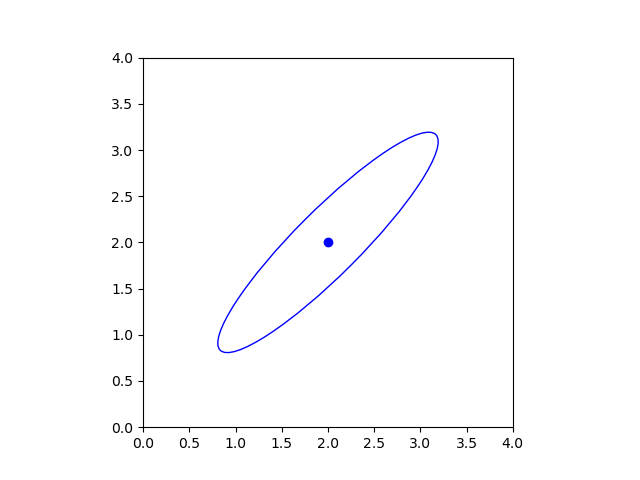

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

u = np.mat([[2], [2]])  
P = np.mat([[2, 1.3],[1.3, 2]])
plotCovariance(u,P, ax, 'b')


# Linear Transform 2D

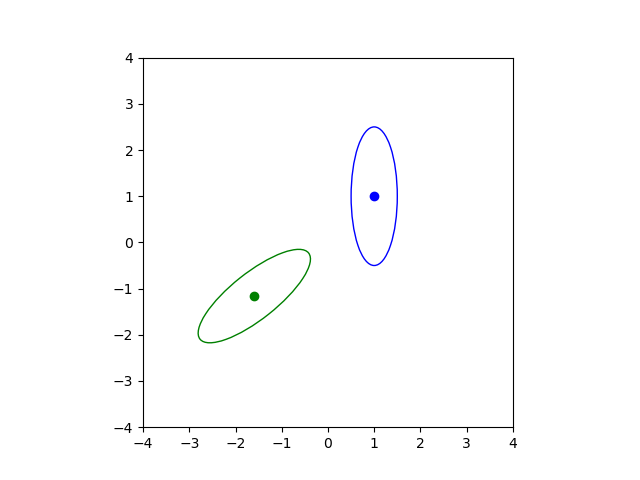

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

u = np.mat([[1], [1]])  
P = np.mat([[1, 0],[0, 3]])

plotCovariance(u,P, ax, 'b')

alpha = 0.9
A =  np.mat([[np.cos(alpha), np.sin(alpha)],[-np.sin(alpha), np.cos(alpha)]])
B =  np.mat([[-3], [-1]])  

u = A*u+B 
P = A*P*A.transpose()
plotCovariance(u,P, ax, 'g')

plt.show()

In [9]:
# Sum of Gaussian 2D

In [10]:
def gaussian_sum ( u1, P1, u2, P2) :
    u = P2*np.linalg.inv(P1+P2) *u1 + P1*np.linalg.inv(P1+P2)*u2
    P = P1*P2*np.linalg.inv(P1+P2)
    return u, P

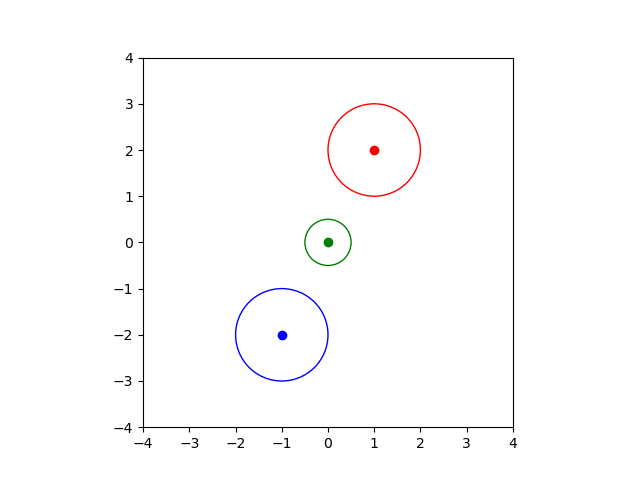

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

u = np.mat([[1], [1]])  
P = np.mat([[1, 0],[0, 3]])


u1 = np.mat([[1], [2]])  
P1 = np.mat([[2, 0],[0, 2]])
plotCovariance(u1,P1, ax, 'r')

u2 = np.mat([[-1], [-2]])  
P2 = np.mat([[2, 0],[0, 2]])
plotCovariance(u2,P2, ax, 'b')

u,P = gaussian_sum ( u1, P1, u2, P2)
plotCovariance(u, P, ax, 'g')

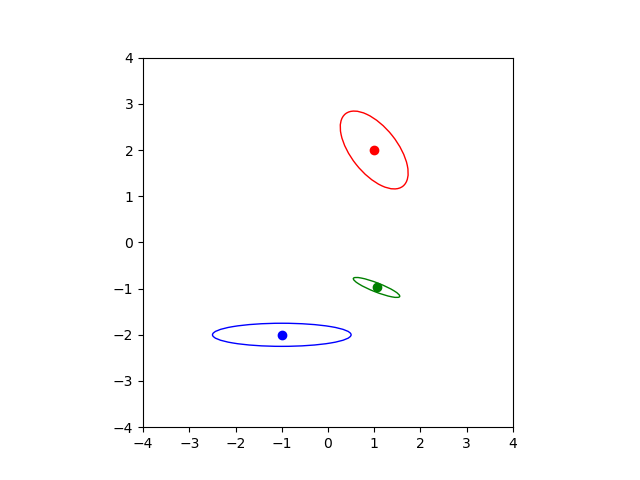

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

u1 = np.mat([[1], [2]])  
alpha = 0.9
A =  np.mat([[np.cos(alpha), np.sin(alpha)],[-np.sin(alpha), np.cos(alpha)]])
P1 = A*np.mat([[2, 0],[0, 1.0]])*A.transpose()
plotCovariance(u1,P1, ax, 'r')

u2 = np.mat([[-1], [-2]])  
P2 = np.mat([[ 3,  0],[ 0,  0.5]])
plotCovariance(u2,P2, ax, 'b')

u,P = gaussian_sum ( u1, P1, u2, P2)
plotCovariance(u, P, ax, 'g')

plt.show()

# Kalman Filter

(0.0, 0.5)

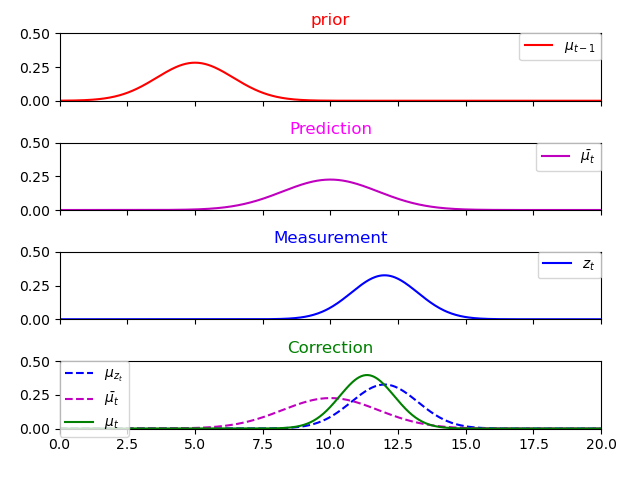

In [31]:
def gaussian_sum ( mean1, sigma1, mean2, sigma2) :
    m = sigma2/(sigma1+sigma2)*mean1 + sigma1/(sigma1+sigma2)*mean2
    s = sigma1*sigma2/(sigma1+sigma2)
    return m, s

f, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, sharex='col', sharey='row')

f.tight_layout(pad=2.0)
x0 = 5.0
P0 = 2.0
ax1.plot(x,norm.pdf(x,x0,math.sqrt(P0)),'r', label=r'$\mu_{t-1}$' )
ax1.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
ax1.set_title('prior', color='red')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 0.5)

# motion
a = 1.2
b = 1
u = 4
Pact = 0.5
x1p = a*x0+b*u
P1p = a*P0*a + Pact*Pact
ax2.plot(x,norm.pdf(x,x1p,math.sqrt(P1p)),'m', label=r'$\bar{\mu_{t}}$' )
ax2.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
ax2.set_title('Prediction', color='magenta')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 0.5)

 #measurement
z = 12
Pz = 1.5
ax3.plot(x,norm.pdf(x,z,math.sqrt(Pz)),'b', label='$z_t$')
ax3.set_xlim(0, 20)
ax3.set_ylim(0, 0.5)
ax3.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
ax3.set_title('Measurement', color='blue')

x1u, P1u = gaussian_sum(x1p, P1p, z, Pz)
ax4.plot(x,norm.pdf(x,z,math.sqrt(Pz)),'b--', label='$\mu_{z_t}$')
ax4.plot(x,norm.pdf(x,x1p,math.sqrt(P1p)),'m--', label=r'$\bar{\mu_{t}}$' )
ax4.plot(x,norm.pdf(x,x1u,math.sqrt(P1u)),'g', label='$\mu_{t}$' )
ax4.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
ax4.set_title('Correction', color='green')
ax4.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.)
ax4.set_xlim(0, 20)
ax4.set_ylim(0, 0.5)
